# Libraries

In [1]:
import pandas as pd
import requests
from missingno import matrix
import io
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk
import re
import numpy as np

## No row & column limit

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data import

## Base URL

In [3]:
# Base url with API endpoint
BASE_URL = "https://data.sonomacounty.ca.gov/resource/924a-vesw.csv" # This is a csv file

## CSV Import

In [4]:
BATCH_SIZE = 1000
offset = 0
dfs = []

while True:
    params = {
        "$limit": BATCH_SIZE,
        "$offset": offset
    }
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()
    # If the response is empty, break
    if not response.text.strip():
        break
    batch_df = pd.read_csv(io.StringIO(response.text))
    if batch_df.empty:
        break
    dfs.append(batch_df)
    offset += BATCH_SIZE
    print(f"Fetched {offset} records...")

# Concatenate all batches
df = pd.concat(dfs, ignore_index=True)
print(f"Total records fetched: {len(df)}")

Fetched 1000 records...
Fetched 2000 records...
Fetched 3000 records...
Fetched 4000 records...
Fetched 5000 records...
Fetched 6000 records...
Fetched 7000 records...
Fetched 8000 records...
Fetched 9000 records...
Fetched 10000 records...
Fetched 11000 records...
Fetched 12000 records...
Fetched 13000 records...
Fetched 14000 records...
Fetched 15000 records...
Fetched 16000 records...
Fetched 17000 records...
Fetched 18000 records...
Fetched 19000 records...
Fetched 20000 records...
Fetched 21000 records...
Fetched 22000 records...
Fetched 23000 records...
Fetched 24000 records...
Fetched 25000 records...
Fetched 26000 records...
Fetched 27000 records...
Fetched 28000 records...
Fetched 29000 records...
Fetched 30000 records...
Fetched 31000 records...
Total records fetched: 30831


## Data preview

In [5]:
df.head()

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total
0,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,2023-11-28T00:00:00.000,2024-01-08T00:00:00.000,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
2,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,2021-11-11T00:00:00.000,K23-046766,DS80,A422038,2023-11-11T00:00:00.000,2024-01-08T00:00:00.000,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,BOOMER,DOG,GERM SHEPHERD/PIT BULL,RED,Male,LARGE,2018-01-29T00:00:00.000,K18-030999,DA17,A381696,2018-12-26T00:00:00.000,2018-12-29T00:00:00.000,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95404.0,"\n, 95404\n(38.451809, -122.692988)",1
4,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,2021-06-08T00:00:00.000,K24-047284,DS68,A423685,2024-01-05T00:00:00.000,2024-01-08T00:00:00.000,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"\n, 93927\n(36.32153, -121.24627)",1


# EDA

## Missing values

<Axes: >

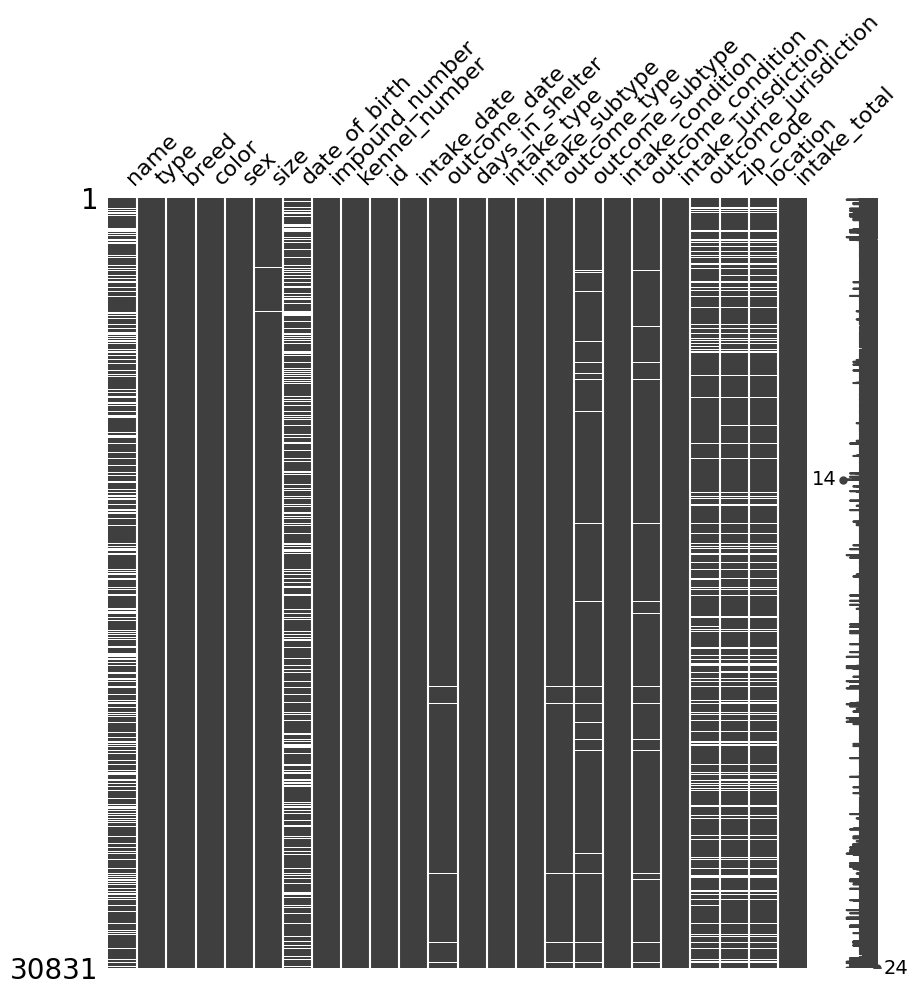

In [6]:
matrix(df, figsize=(10, 10))

### Missing value percentages

In [7]:
# Number of missing values as percentage
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

name                    26.486329
type                     0.000000
breed                    0.000000
color                    0.000000
sex                      0.000000
size                     0.116766
date_of_birth           24.329409
impound_number           0.000000
kennel_number            0.025948
id                       0.000000
intake_date              0.000000
outcome_date             0.687620
days_in_shelter          0.000000
intake_type              0.000000
intake_subtype           0.000000
outcome_type             0.707081
outcome_subtype          1.813110
intake_condition         0.000000
outcome_condition        1.881223
intake_jurisdiction      0.000000
outcome_jurisdiction    14.735169
zip_code                14.680030
location                14.680030
intake_total             0.000000
dtype: float64

## Data types, info for dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30831 entries, 0 to 30830
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  22665 non-null  object 
 1   type                  30831 non-null  object 
 2   breed                 30831 non-null  object 
 3   color                 30831 non-null  object 
 4   sex                   30831 non-null  object 
 5   size                  30795 non-null  object 
 6   date_of_birth         23330 non-null  object 
 7   impound_number        30831 non-null  object 
 8   kennel_number         30823 non-null  object 
 9   id                    30831 non-null  object 
 10  intake_date           30831 non-null  object 
 11  outcome_date          30619 non-null  object 
 12  days_in_shelter       30831 non-null  int64  
 13  intake_type           30831 non-null  object 
 14  intake_subtype        30831 non-null  object 
 15  outcome_type       

Not all variables should be objects, like date of borith, impound number, kenner number, ID, intake date, 

## Intake class counts

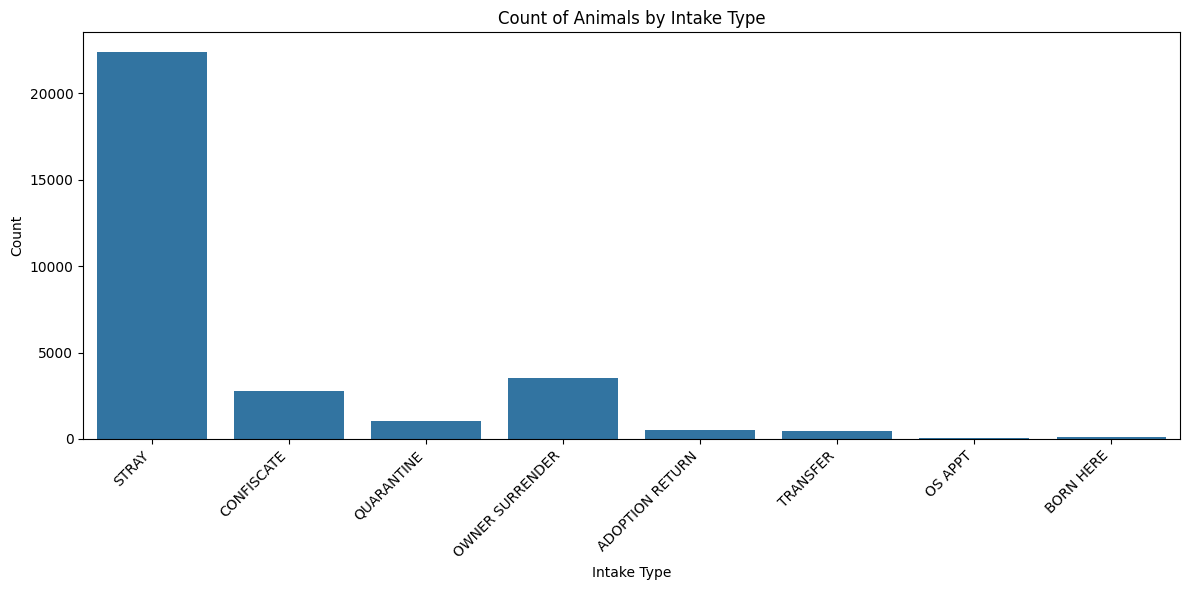

In [9]:
# intake_type class count histogram
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='intake_type')
plt.title('Count of Animals by Intake Type')
plt.xlabel('Intake Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



## Outcome type class count

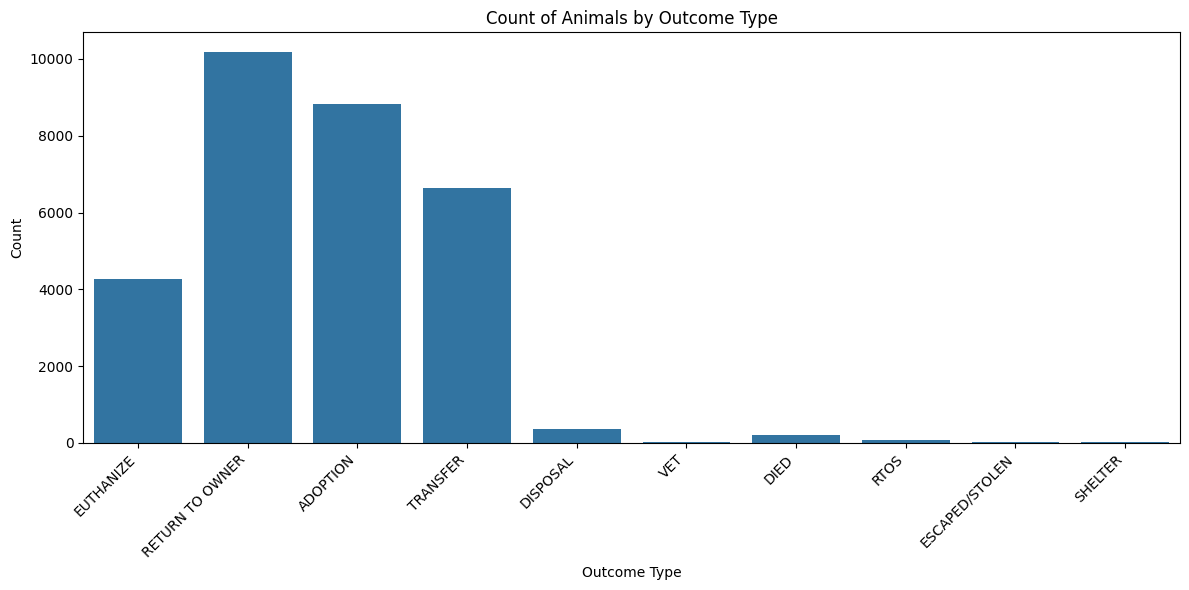

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='outcome_type')
plt.title('Count of Animals by Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Outcome buckets

Bucket outcomes like this:
1. Adoption = "ADOPTION"
2. Transfer = ["TRANSFER", "RETURN TO OWNER", "RTOS"]
3. Euthanasia = ["EUTHANASIA"]
4. Pending = ["SHELTER", "VET", "ESCAPED/STOLEN"]
5. Death = ["DIED", "DISPOSAL"]

Drop Pending, death, and unknown columns since they aren't enough in number

# Data cleaning

In [11]:
df.head()

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total
0,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
1,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,2023-11-28T00:00:00.000,2024-01-08T00:00:00.000,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
2,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,2021-11-11T00:00:00.000,K23-046766,DS80,A422038,2023-11-11T00:00:00.000,2024-01-08T00:00:00.000,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
3,BOOMER,DOG,GERM SHEPHERD/PIT BULL,RED,Male,LARGE,2018-01-29T00:00:00.000,K18-030999,DA17,A381696,2018-12-26T00:00:00.000,2018-12-29T00:00:00.000,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95404.0,"\n, 95404\n(38.451809, -122.692988)",1
4,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,2021-06-08T00:00:00.000,K24-047284,DS68,A423685,2024-01-05T00:00:00.000,2024-01-08T00:00:00.000,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"\n, 93927\n(36.32153, -121.24627)",1


## Changing lat-long from object to numbers

In [12]:
# Function to extract the (lat, lon) string or keep NaN
def extract_latlon(val):
    if pd.isnull(val):
        return np.nan
    match = re.search(r'\(([^)]+)\)', val)
    if match:
        return f"({match.group(1)})"
    else:
        return np.nan

In [13]:
# Apply extraction
df['location_clean'] = df['location'].apply(extract_latlon)

In [14]:
# Split into latitude and longitude columns
def split_latlon(val):
    if pd.isnull(val):
        return pd.Series([np.nan, np.nan])
    latlon = val.strip('()').split(',')
    if len(latlon) == 2:
        return pd.Series([float(latlon[0]), float(latlon[1])])
    else:
        return pd.Series([np.nan, np.nan])


In [15]:
df[['latitude', 'longitude']] = df['location_clean'].apply(split_latlon)

In [16]:
df = df.drop(columns=['location_clean'])

In [17]:
df.head()

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total,latitude,longitude
0,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,NaN,NaN
1,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,2023-11-28T00:00:00.000,2024-01-08T00:00:00.000,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN,NaN
2,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,2021-11-11T00:00:00.000,K23-046766,DS80,A422038,2023-11-11T00:00:00.000,2024-01-08T00:00:00.000,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,NaN,NaN
3,BOOMER,DOG,GERM SHEPHERD/PIT BULL,RED,Male,LARGE,2018-01-29T00:00:00.000,K18-030999,DA17,A381696,2018-12-26T00:00:00.000,2018-12-29T00:00:00.000,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95404.0,"\n, 95404\n(38.451809, -122.692988)",1,38.451809,-122.692988
4,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,2021-06-08T00:00:00.000,K24-047284,DS68,A423685,2024-01-05T00:00:00.000,2024-01-08T00:00:00.000,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"\n, 93927\n(36.32153, -121.24627)",1,36.321530,-121.246270


## Binary outcome type column

In [35]:
df.drop(columns=['adoption'], inplace=True)

In [31]:
# Bucket outcomes like this:
#1. Adoption = "ADOPTION"
#2. Transfer = ["TRANSFER", "RETURN TO OWNER", "RTOS"]
#3. Euthanasia = ["EUTHANASIA"]
#4. Pending = ["SHELTER", "VET", "ESCAPED/STOLEN"]
#5. Death = ["DIED", "DISPOSAL"]

# Create a new column "outcome_type_bucket"
df['outcome_type_bucket'] = df['outcome_type'].apply(lambda x: 
    'Adoption' if x == 'ADOPTION' else
    'Transfer' if x in ['TRANSFER', 'RETURN TO OWNER', 'RTOS'] else
    'Euthanasia' if x == 'EUTHANIZE' else
    'Pending' if x in ['SHELTER', 'VET', 'ESCAPED/STOLEN'] else
    'Death' if x in ['DIED', 'DISPOSAL'] else
    'Unknown')

In [36]:
df.head(20)

,name,type,breed,color,sex,size,date_of_birth,impound_number,kennel_number,id,intake_date,outcome_date,days_in_shelter,intake_type,intake_subtype,outcome_type,outcome_subtype,intake_condition,outcome_condition,intake_jurisdiction,outcome_jurisdiction,zip_code,location,intake_total,latitude,longitude,outcome_type_bucket
0,NaN,DOG,SIBERIAN HUSKY,BLACK/WHITE,Male,MED,NaN,K23-046984,DA21,A422697,2023-12-04T00:00:00.000,2024-01-08T00:00:00.000,35,STRAY,FLD_STRAY,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,NaN,NaN,Euthanasia
1,NaN,DOG,PIT BULL,GRAY,Female,MED,NaN,K23-046923,DS60,A422443,2023-11-28T00:00:00.000,2024-01-08T00:00:00.000,41,STRAY,FLD_STRAY,EUTHANIZE,BEH SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN,NaN,Euthanasia
2,NaN,DOG,GERM SHEPHERD,TAN/BLACK,Female,LARGE,2021-11-11T00:00:00.000,K23-046766,DS80,A422038,2023-11-11T00:00:00.000,2024-01-08T00:00:00.000,58,STRAY,FIELD,EUTHANIZE,AGGRESSIVE,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1,NaN,NaN,Euthanasia
3,BOOMER,DOG,GERM SHEPHERD/PIT BULL,RED,Male,LARGE,2018-01-29T00:00:00.000,K18-030999,DA17,A381696,2018-12-26T00:00:00.000,2018-12-29T00:00:00.000,3,CONFISCATE,FLD_ARREST,RETURN TO OWNER,OVER THE COUNTER_ARREST,UNKNOWN,PENDING,COUNTY,SANTA ROSA,95404.0,"\n, 95404\n(38.451809, -122.692988)",1,38.451809,-122.692988,Transfer
4,FAUNA,DOG,GERM SHEPHERD,FAWN,Spayed,SMALL,2021-06-08T00:00:00.000,K24-047284,DS68,A423685,2024-01-05T00:00:00.000,2024-01-08T00:00:00.000,3,STRAY,OVER THE COUNTER,RETURN TO OWNER,NaN,UNKNOWN,HEALTHY,SANTA ROSA,NaN,93927.0,"\n, 93927\n(36.32153, -121.24627)",1,36.321530,-121.246270,Transfer
5,WILLOW,DOG,SHIH TZU,WHITE,Female,SMALL,2012-04-04T00:00:00.000,K24-048085,DS90,A425655,2024-04-04T00:00:00.000,2024-04-05T00:00:00.000,1,STRAY,FLD_STRAY,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95401.0,"\n, 95401\n(38.44366, -122.7246163)",1,38.443660,-122.724616,Transfer
6,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,K24-048098,TRUCK,A425678,2024-04-05T00:00:00.000,2024-04-05T00:00:00.000,0,QUARANTINE,FIELD,EUTHANIZE,FRA,UNKNOWN,HEALTHY,*PETALUMA,NaN,NaN,NaN,1,NaN,NaN,Euthanasia
7,SASHA,DOG,DACHSHUND LH,RED,Neutered,TOY,2012-07-13T00:00:00.000,K24-047991,DQ107,A299415,2024-03-24T00:00:00.000,2024-04-05T00:00:00.000,12,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,MEDICAL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"\n, 95403\n(38.4716444, -122.7398255)",1,38.471644,-122.739825,Transfer
8,BOOMER,DOG,GERM SHEPHERD/PIT BULL,RED,Male,LARGE,2018-01-29T00:00:00.000,K18-030826,DS60,A381696,2018-12-06T00:00:00.000,2018-12-07T00:00:00.000,1,STRAY,OVER THE COUNTER,RETURN TO OWNER,OVER THE COUNTER_WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"\n, 95404\n(38.451809, -122.692988)",1,38.451809,-122.692988,Transfer
9,ROSIE,DOG,DACHSHUND LH,BROWN/RED,Spayed,TOY,2012-07-13T00:00:00.000,K24-047990,DQ107,A299416,2024-03-24T00:00:00.000,2024-04-05T00:00:00.000,12,CONFISCATE,FLD_HOSPTL,RETURN TO OWNER,MEDICAL,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95403.0,"\n, 95403\n(38.4716444, -122.7398255)",1,38.471644,-122.739825,Transfer


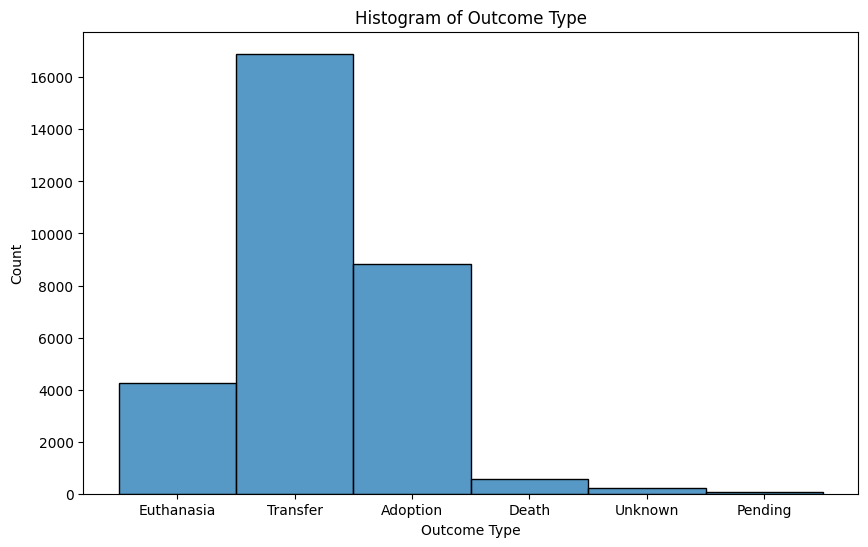

In [33]:
# Histogram of OUTCOME_TYPE
plt.figure(figsize=(10, 6))
sns.histplot(df['outcome_type_bucket'], bins=2, kde=False)
plt.title('Histogram of Outcome Type')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.show()

In [38]:
# Drop rows where "Death", "Unknown", "Pending" is in outcome_type_bucket
df = df[~df['outcome_type_bucket'].isin(['Death', 'Unknown', 'Pending'])]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29992 entries, 0 to 30828
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  22400 non-null  object 
 1   type                  29992 non-null  object 
 2   breed                 29992 non-null  object 
 3   color                 29992 non-null  object 
 4   sex                   29992 non-null  object 
 5   size                  29957 non-null  object 
 6   date_of_birth         22945 non-null  object 
 7   impound_number        29992 non-null  object 
 8   kennel_number         29992 non-null  object 
 9   id                    29992 non-null  object 
 10  intake_date           29992 non-null  object 
 11  outcome_date          29992 non-null  object 
 12  days_in_shelter       29992 non-null  int64  
 13  intake_type           29992 non-null  object 
 14  intake_subtype        29992 non-null  object 
 15  outcome_type          29